In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('/proj/ppd/brain_size.csv', sep=';')

In [5]:
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,.,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545


In [6]:
data[data['Gender']=='Female']['VIQ'].mean()

109.45

In [36]:
import numpy as np
data=data.replace(['.'],[np.nan])

In [8]:
groupby_gender=data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [41]:
data[['Weight','Height']]=data[['Weight','Height']].astype('float')

In [43]:
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [11]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,MRI_Count
Gender,,,,,
Female,19.65,111.9,109.45,110.45,862654.6
Male,21.35,115.0,115.25,111.60,954855.4


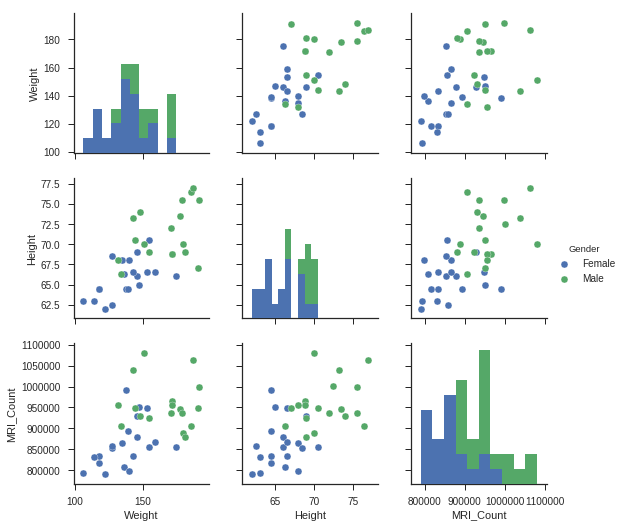

In [74]:
import seaborn as sns
sns.set(style='ticks', color_codes=True)

g=sns.pairplot(data=data, vars=['Weight', 'Height', 'MRI_Count'], dropna=True, hue='Gender')  #set hue to set color
sns.plt.show()

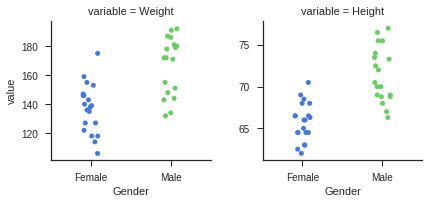

In [85]:
melt=pd.melt(data, id_vars=['Gender'], value_vars=['Weight','Height'])
g=sns.FacetGrid(melt,col='variable',col_wrap=4, sharex=False, sharey=False)
g.map(sns.stripplot, 'Gender', 'value', jitter=True, palette="muted")
sns.plt.show()

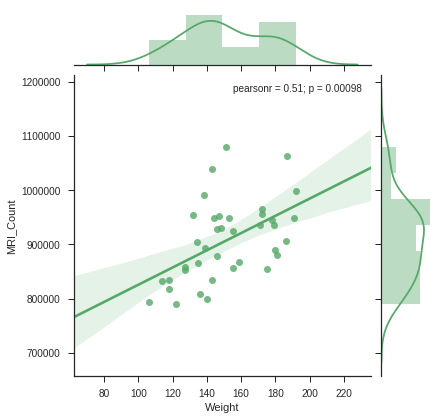

In [69]:
sns.jointplot(data=data, x='Weight', y='MRI_Count', kind='reg', dropna=True,color='g')
sns.plt.show()

In [66]:
data['Weight'].dtype

dtype('float64')

In [55]:
data.isnull().sum()

Unnamed: 0    0
Gender        0
FSIQ          0
VIQ           0
PIQ           0
Weight        2
Height        1
MRI_Count     0
dtype: int64

In [54]:
pd.isna(data['Weight'])

AttributeError: module 'pandas' has no attribute 'isna'